In [1]:
import os
import sys

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [2]:
sys.path.append(r'C:\Users\lesliec\code')

In [3]:
from tbd_eeg.tbd_eeg.data_analysis.eegutils import EEGexp
from tbd_eeg.tbd_eeg.data_analysis.Utilities.behavior_movies import Movie, get_sync_frame_times
from tbd_eeg.tbd_eeg.data_analysis.Utilities.utilities import find_nearest_ind

In [4]:
%matplotlib notebook

## Load data

In [5]:
dfolder = r'P:\mouse666196\pilot_aw_psi_2023-03-16_10-21-29\experiment1\recording1'
# load experiment metadata and eeg data
exp = EEGexp(dfolder, preprocess=False)

Experiment type: electrical and sensory stimulation


## Load running

In [6]:
## Set running file names ##
running_file = os.path.join(exp.data_folder, 'running_signal.npy')
running_ts_file = os.path.join(exp.data_folder, 'running_timestamps_master_clock.npy')

## Load running signal and get mean event speed ##
if os.path.exists(running_file):
    print('Loading running from saved file...')
    run_signal = np.load(running_file)
    run_timestamps = np.load(running_ts_file)
else:
    print('Loading running from sync and saving, this may take awhile...')
    run_signal, run_timestamps = exp.load_running()
    np.save(running_file, run_signal, allow_pickle=False)
    np.save(running_ts_file, run_timestamps, allow_pickle=False)

Loading running from saved file...


<IPython.core.display.Javascript object>


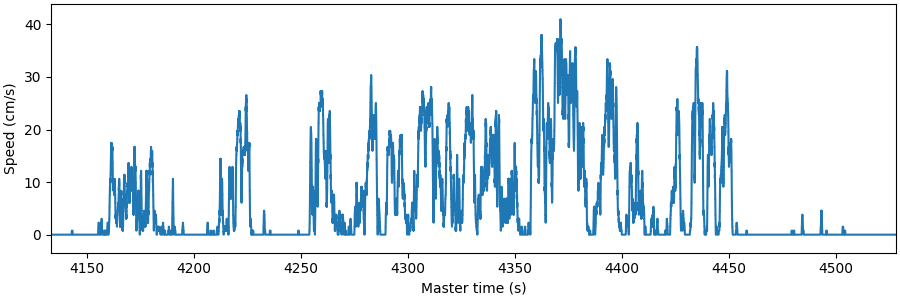

(0.0, 9803.99)

In [7]:
fig, ax = plt.subplots(figsize=(9,3), constrained_layout=True)
ax.plot(run_timestamps, run_signal)
ax.set_xlabel('Master time (s)')
ax.set_ylabel('Speed (cm/s)')
ax.set_xlim([run_timestamps[0], run_timestamps[-1]])

## Load movies

In [8]:
pupil_video = Movie(
    filepath = exp.pupilmovie_file,
    sync_filepath = exp.sync_file,
    sync_channel = 'eyetracking'
)
pupil_ts = pupil_video.sync_timestamps
body_video = Movie(
    filepath = exp.bodymovie_file,
    sync_filepath = exp.sync_file,
    sync_channel = 'behavior'
)
body_ts = body_video.sync_timestamps

In [9]:
print(body_ts[0])
print(len(body_ts))

13.24454
500127


In [10]:
testind = find_nearest_ind(body_ts, 4140.0)
print(testind)

210859


In [11]:
## Load native frame times ##
bodyh5 = h5py.File(exp.bodymovie_file.replace('.avi','.h5'), 'r')
body_native_ts = np.hstack((0, np.cumsum(bodyh5['frame_intervals'])))
print(len(body_native_ts))

500127


In [12]:
print(body_native_ts[testind])
print(body_native_ts[testind] / 60)

4127.043003499974
68.7840500583329


#### Play movie from the beginning

#### Play movie from some frame

In [33]:
cap = cv2.VideoCapture(exp.bodymovie_file)
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(total_frames)
fps = cap.get(cv2.CAP_PROP_FPS)
print(fps)
cap.set(cv2.CAP_PROP_POS_FRAMES, testind)
ret, frame = cap.read()
while(1):
   ret, frame = cap.read()
   cv2.imshow('frame',frame)
   if cv2.waitKey(1) & 0xFF == ord('q') or ret==False :
       cap.release()
       cv2.destroyAllWindows()
       break
   cv2.imshow('frame',frame)

510147.0
60.0


## Example of fast mouse (~60 cm/s)

In [16]:
fastind = find_nearest_ind(body_ts, 20.0)

cap = cv2.VideoCapture(exp.bodymovie_file)
cap.set(cv2.CAP_PROP_POS_FRAMES, fastind)
ret, frame = cap.read()
while(1):
   ret, frame = cap.read()
   cv2.imshow('frame',frame)
   if cv2.waitKey(1) & 0xFF == ord('q') or ret==False :
       cap.release()
       cv2.destroyAllWindows()
       break
   cv2.imshow('frame',frame)

510147.0


## Example of slow mouse (~15 cm/s)

In [22]:
slowind = find_nearest_ind(body_ts, 1320.0)

cap = cv2.VideoCapture(exp.bodymovie_file)
cap.set(cv2.CAP_PROP_POS_FRAMES, slowind)
ret, frame = cap.read()
while(1):
   ret, frame = cap.read()
   cv2.imshow('frame',frame)
   if cv2.waitKey(1) & 0xFF == ord('q') or ret==False :
       cap.release()
       cv2.destroyAllWindows()
       break
   cv2.imshow('frame',frame)

## Get video info

In [7]:
print(body_video.frame_count)
print(len(body_ts))
print(len(body_ts) - body_video.frame_count)

349014
348786
-228


In [8]:
len(body_video.sync_timestamps)

348786

In [9]:
len(body_video.timestamps_from_file)

349014

In [8]:
print(body_ts[:5])
print(body_ts[-5:])

[11.09972 11.11404 11.12773 11.14334 11.16025]
[3846.45251 3846.46924 3846.48593 3846.50251 3846.52495]


In [19]:
print(228 / (1/(np.mean(np.diff(body_ts[2:20])))))

3.7957976470588064


In [9]:
print(pupil_video.frame_count)
print(len(pupil_ts))
print(len(pupil_ts) - pupil_video.frame_count)

174864
174750
-114


In [10]:
print(pupil_ts[:5])
print(pupil_ts[-5:])

[13.84473 13.85653 13.88744 13.92065 13.95399]
[5842.39681 5842.4341  5842.46362 5842.49684 5842.53179]


In [11]:
print(np.diff(pupil_ts[:30]))

[0.0118  0.03091 0.03321 0.03334 0.03336 0.03338 0.03398 0.03273 0.03344
 0.03716 0.02943 0.03328 0.03433 0.0323  0.03327 0.0334  0.0333  0.03329
 0.03334 0.03799 0.02866 0.0335  0.03415 0.03244 0.03334 0.03332 0.03331
 0.03329 0.03334]


In [12]:
med_pupil_diff = np.median(np.diff(pupil_ts))
print(med_pupil_diff)

0.03333000000020547


In [64]:
0.00217 + 0.01979

0.02196

In [13]:
delta = 0.04
print(np.sum(np.diff(pupil_ts) < med_pupil_diff - delta))
print(np.sum(np.diff(pupil_ts) > med_pupil_diff * 4.6))

0
11


In [14]:
for indi in np.nonzero(np.diff(pupil_ts) > med_pupil_diff * 4.6)[0]:
    print(np.diff(pupil_ts)[indi:indi+5])

[0.21993 0.00176 0.01139 0.03387 0.03284]
[0.19945 0.00186 0.03203 0.0334  0.03334]
[0.3566  0.00222 0.04037 0.03331 0.03322]
[0.18859 0.00201 0.04288 0.03324 0.03331]
[0.91888 0.00207 0.01188 0.03357 0.03313]
[0.16212 0.00223 0.03564 0.03325 0.03336]
[0.32928 0.00208 0.03532 0.03332 0.03334]
[0.32149 0.0018  0.01023 0.03304 0.03326]
[0.16303 0.00332 0.03365 0.0333  0.03335]
[0.16856 0.00245 0.02923 0.03319 0.0334 ]
[0.23303 0.00192 0.03159 0.03348 0.03332]


### Frame mismatch...try to align with running?

In [10]:
run_signal, run_timestamps = exp.load_running()

In [11]:
print(run_timestamps[:10])
print(body_ts[:10])
print(pupil_ts[:10])

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
[13.89963 13.91051 13.91384 13.93019 13.94683 13.9635  13.98027 13.99688
 14.01381 14.03016]
[13.84473 13.85653 13.88744 13.92065 13.95399 13.98735 14.02073 14.05471
 14.08744 14.12088]


<IPython.core.display.Javascript object>


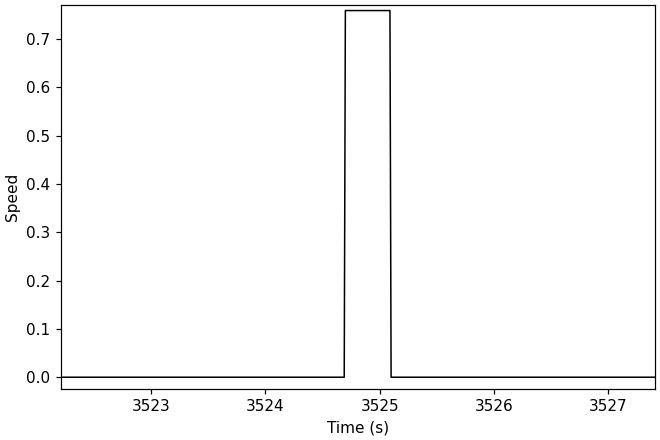

Text(0, 0.5, 'Speed')

In [21]:
fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)
ax.plot(run_timestamps, run_signal, color='k', linewidth=1)
ax.set_xlim([run_timestamps[0], run_timestamps[-1]])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Speed')

In [22]:
time_int = [3520.5, 3529.]
movietimes = body_video.sync_timestamps[
    np.nonzero((body_video.sync_timestamps > time_int[0]) & (body_video.sync_timestamps < time_int[1]))[0]
]
runinds = np.nonzero((run_timestamps > time_int[0]) & (run_timestamps < time_int[1]))[0]

In [23]:
def update(frame):
    current_time = movietimes[frame]
    
    # body cam movie
    bax.set_data(body_video.get_frame(time=current_time))
    
    # eeg plot
    spline.set_data([current_time, current_time], [0,1])
    
    return fig

<IPython.core.display.Javascript object>


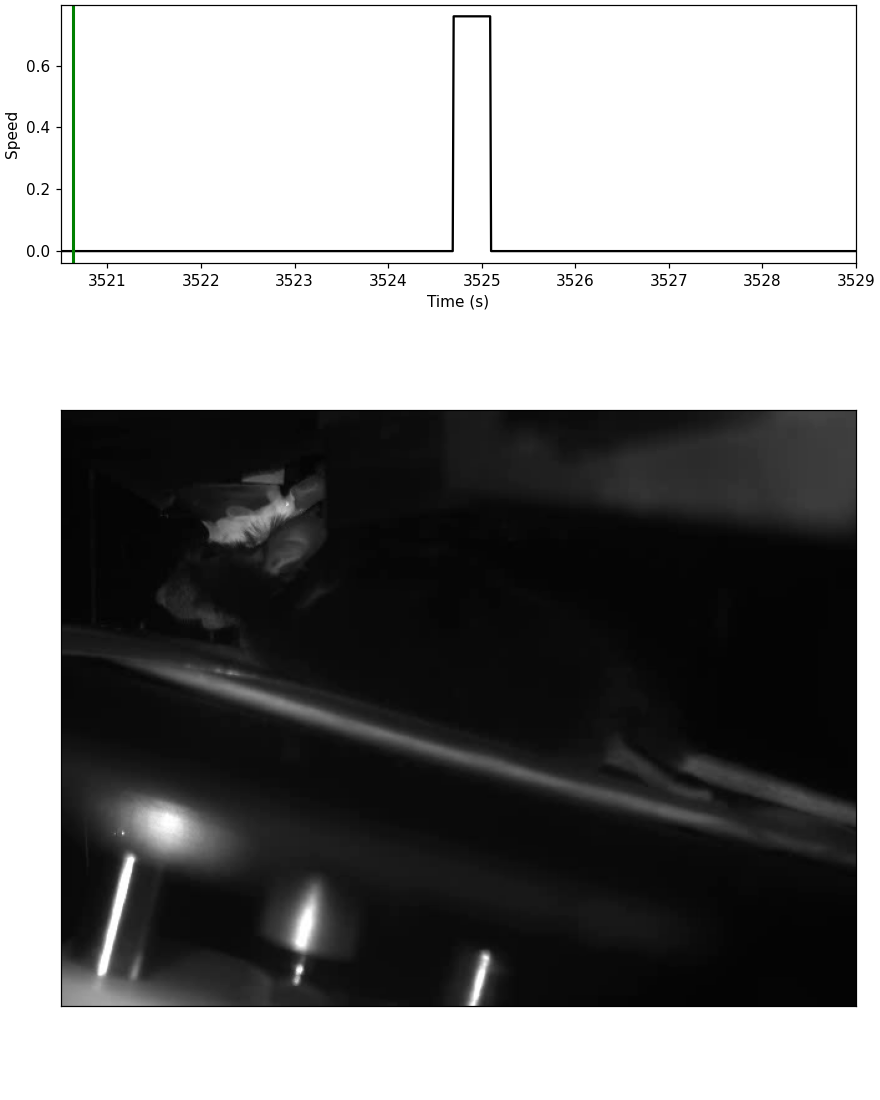

In [24]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,10), constrained_layout=True, gridspec_kw={'height_ratios': [1,3]})

# running speed
axs[0].plot(run_timestamps[runinds], run_signal[runinds], 'k')
axs[0].set_xlim(time_int)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Speed')
spline = axs[0].axvline(x=movietimes[0], color='green', linewidth=2)

# body cam movie
bax = axs[1].imshow(body_video.get_frame(time=movietimes[0]))
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)

anim = animation.FuncAnimation(fig, update, init_func=None, frames=len(movietimes), interval=66, blit=False)